PRECIPITAÇÃO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors


In [2]:
f = '../../Weather Station Data/CasaDeAgua_CDAWX_4July13_1July19.csv'
dados = pd.read_csv(f, encoding="latin1")
df = dados

In [3]:

df['Datetime'] = pd.to_datetime(df['Datetime'], format='%m/%d/%Y %H:%M')

# Faz com que o datetime vire um index
df.set_index('Datetime', inplace=True)

# Calcular a soma diária da variável de precipitação
soma_diaria = df['Precipitation (mm)'].resample('D').sum()

# Criar listas separadas de datas e soma
datas = soma_diaria.index.strftime('%m/%d/%Y').tolist()  # Converter as datas para string no formato desejado
somas = soma_diaria.tolist()  # Converter as somas para uma lista
datas = pd.to_datetime(datas)
df = pd.DataFrame({'data': datas, 'soma': somas})


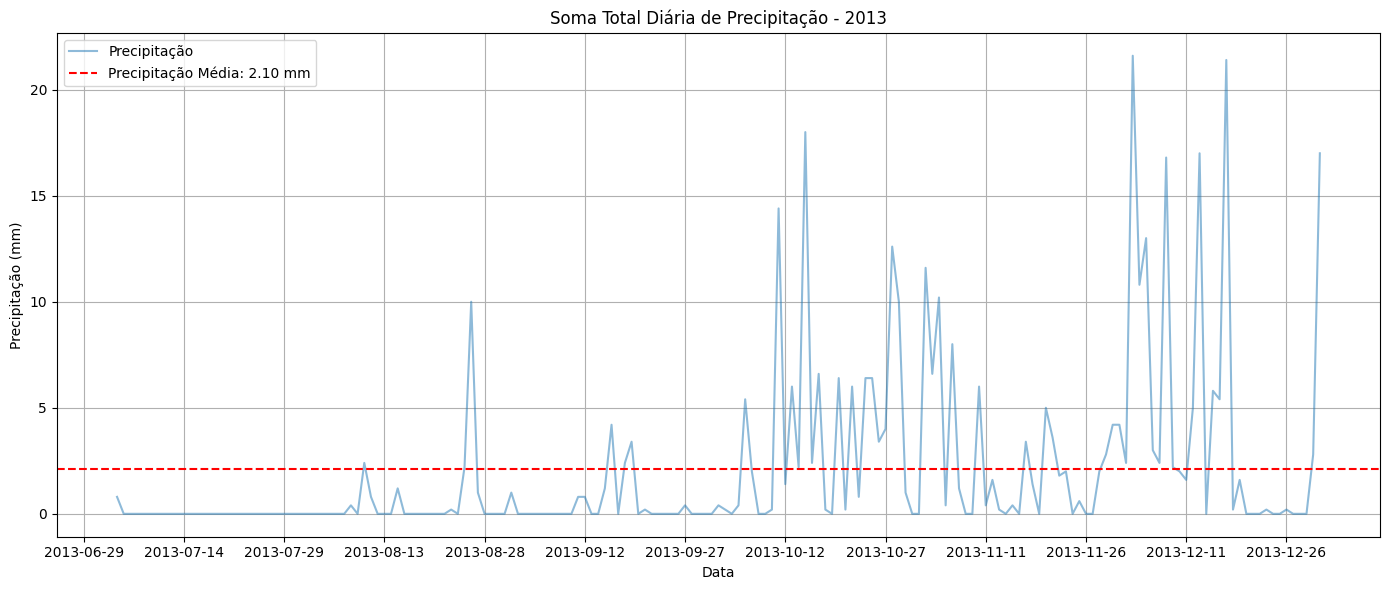

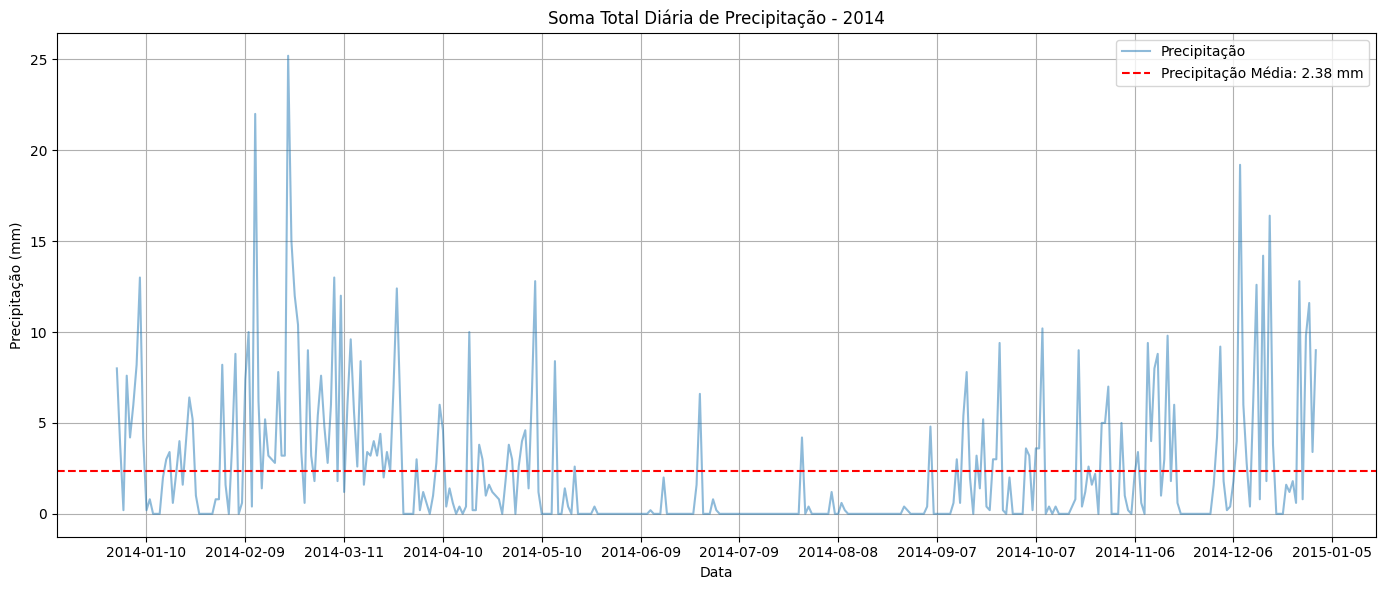

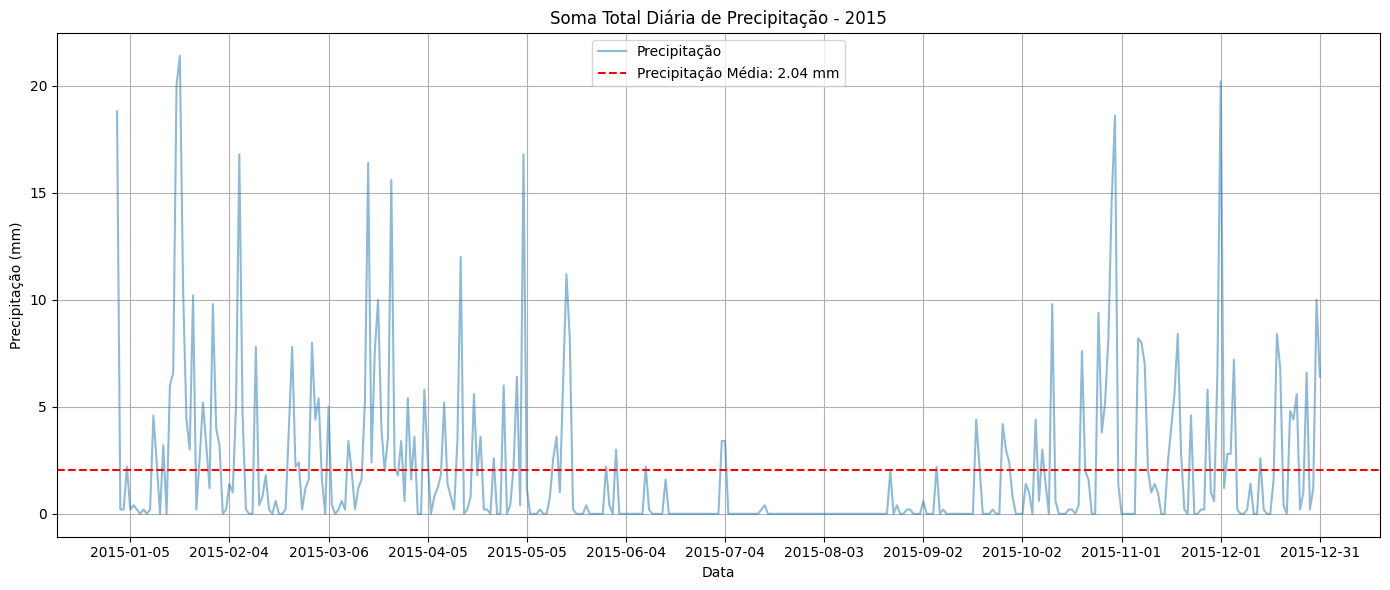

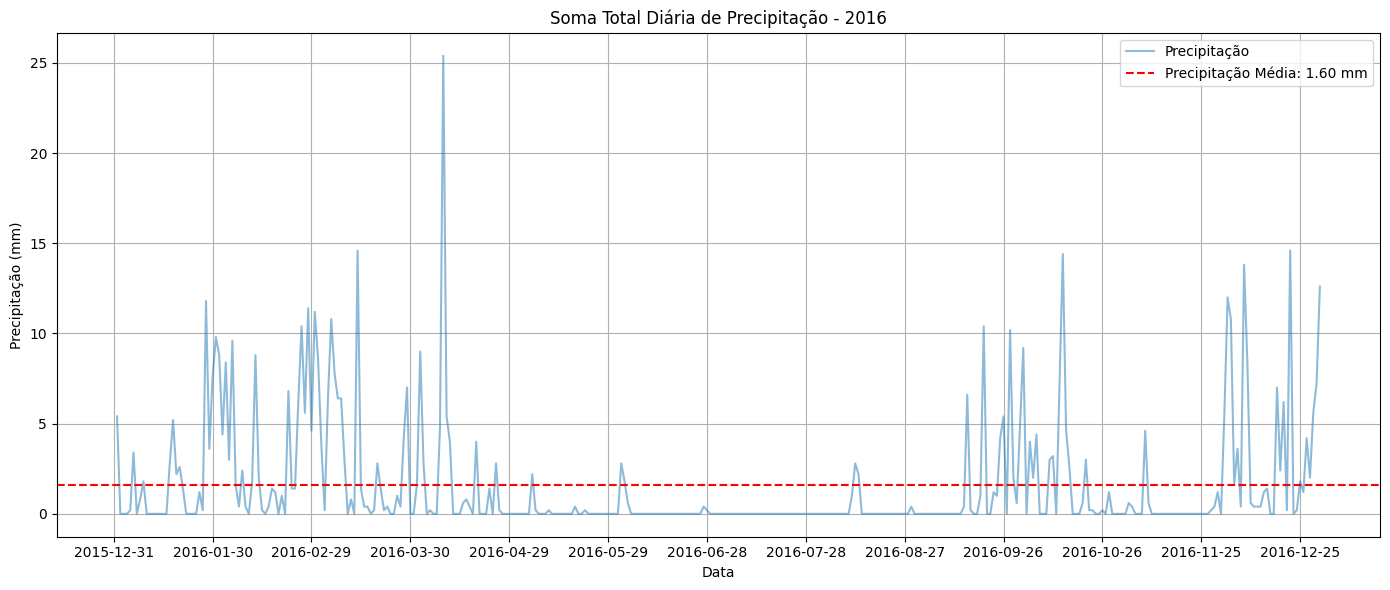

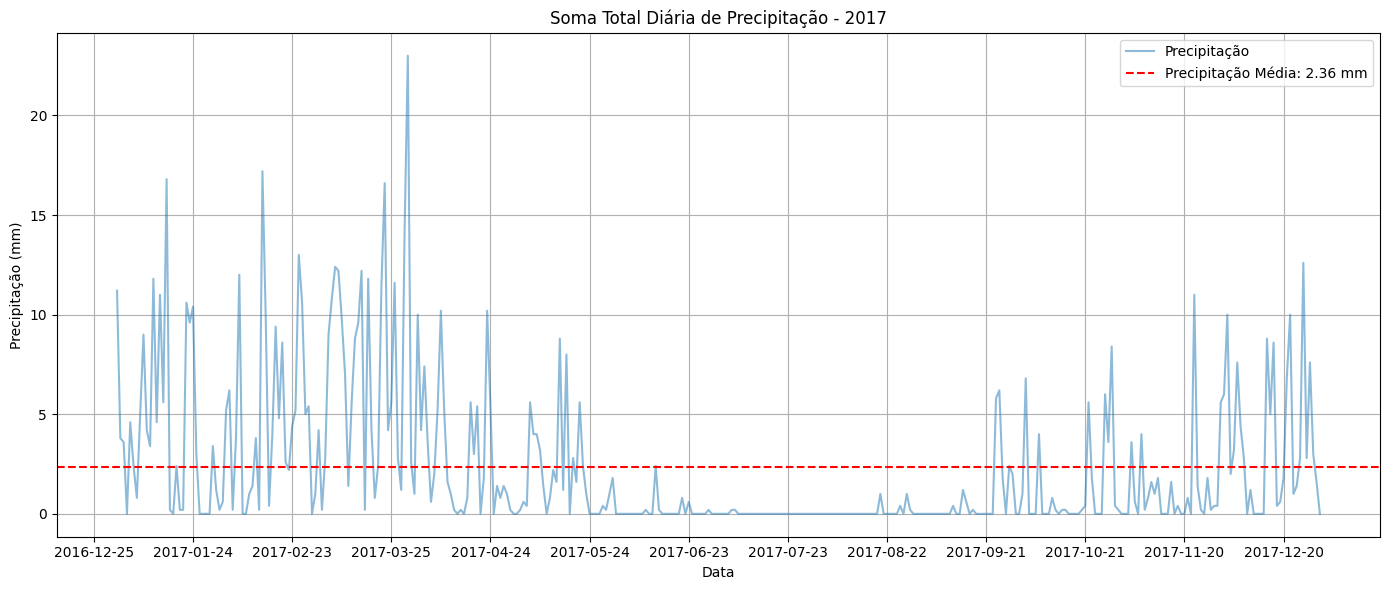

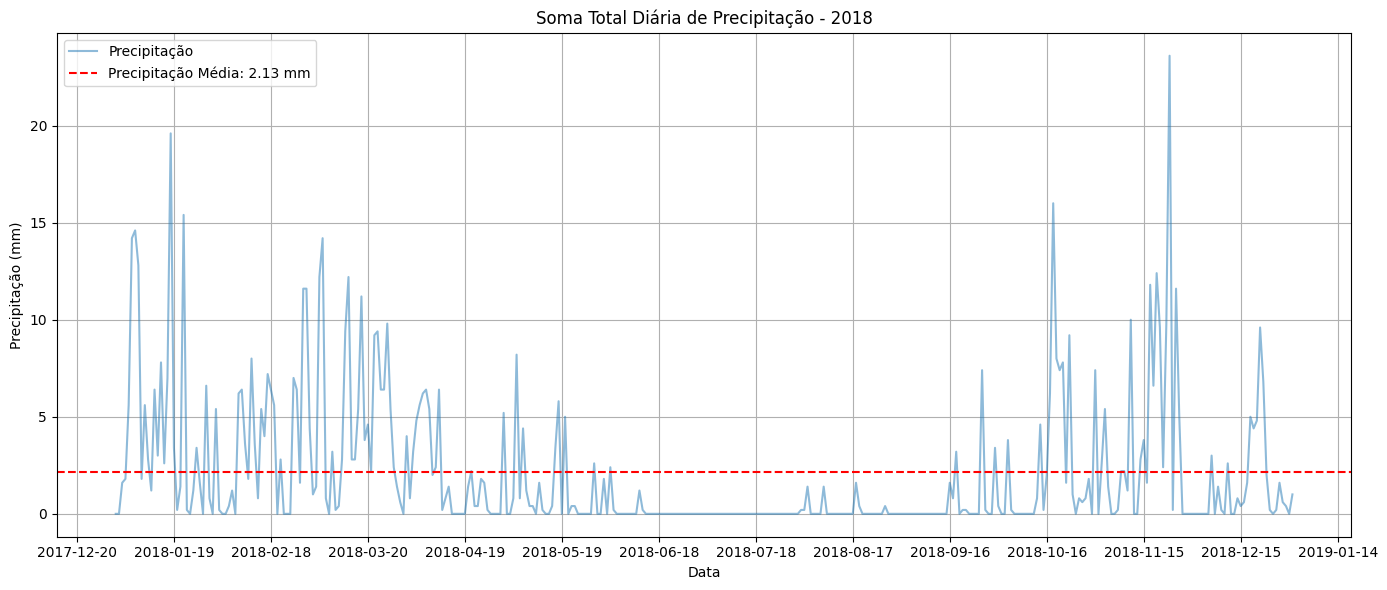

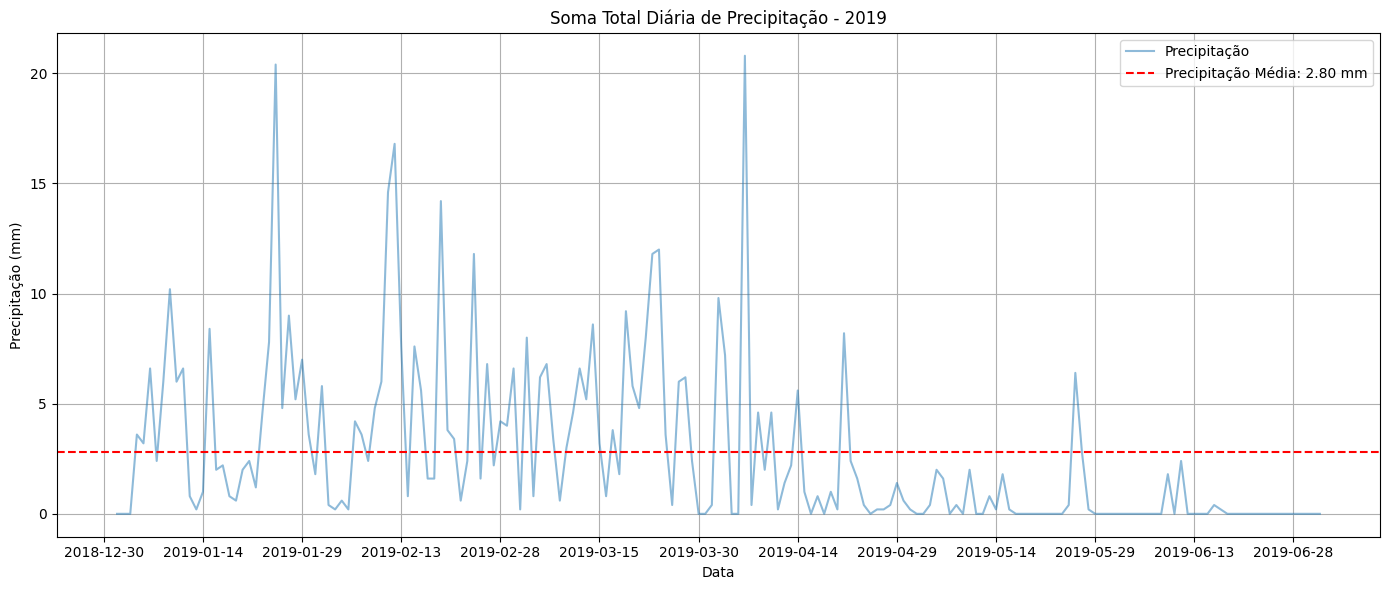

In [4]:

# Obter os anos únicos presentes nos dados
anos_unicos = df['data'].dt.year.unique()

# Criar gráficos separados para cada ano
for ano in anos_unicos:
    # Filtrar os dados para o ano atual
    df_ano = df[df['data'].dt.year == ano]
    
    # Criar o gráfico
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(df_ano['data'], df_ano['soma'], label=f'Precipitação', alpha=0.5)
    
    # Calcular a precipitação média para o ano
    precipitacao_media = df_ano['soma'].mean()

    # Exibir quantas dadas quiser no eixo X
    ax.xaxis.set_major_locator(plt.MaxNLocator(15))  

    # Adicionar a linha de precipitação média com valor na legenda
    ax.axhline(y=precipitacao_media, color='red', linestyle='--', label=f'Precipitação Média: {precipitacao_media:.2f} mm')

    # Adicionar título e rótulos
    plt.title(f'Soma Total Diária de Precipitação - {ano}')
    plt.xlabel('Data')
    plt.ylabel('Precipitação (mm)')
    plt.legend()  # A legenda agora inclui o valor da precipitação média
    plt.grid()

    # Ajustar layout e exibir o gráfico
    plt.tight_layout()
    plt.show()



In [5]:
df_ano

,data,soma
2007,2019-01-01,0.0
2008,2019-01-02,0.0
2009,2019-01-03,0.0
2010,2019-01-04,3.6
2011,2019-01-05,3.2
...,...,...
2185,2019-06-28,0.0
2186,2019-06-29,0.0
2187,2019-06-30,0.0
2188,2019-07-01,0.0


In [6]:
# Obter os anos únicos presentes nos dados
anos_unicos = df['data'].dt.year.unique()

soma_por_ano = []
for ano in anos_unicos:
    df_ano = df[df['data'].dt.year == ano]
    soma_ano = sum(df_ano['soma'])
    print(f"A soma de todas as precipitação diárias em {ano} é: {soma_ano:.2f}")
    soma_por_ano.append(soma_ano)



A soma de todas as precipitação diárias em 2013 é: 380.40
A soma de todas as precipitação diárias em 2014 é: 867.40
A soma de todas as precipitação diárias em 2015 é: 745.00
A soma de todas as precipitação diárias em 2016 é: 583.80
A soma de todas as precipitação diárias em 2017 é: 861.00
A soma de todas as precipitação diárias em 2018 é: 777.20
A soma de todas as precipitação diárias em 2019 é: 512.00


In [7]:
media_2013_a_2019 = sum(soma_por_ano)/len(soma_por_ano)

In [8]:

print(f"A média de precipitação anual entre 2013 a 2019 foi de: {media_2013_a_2019:.2f}")

A média de precipitação anual entre 2013 a 2019 foi de: 675.26


In [9]:
f = '../../Weather Station Data/CasaDeAgua_CDAWX_4July13_1July19.csv'
dados = pd.read_csv(f, encoding="latin1")
# Para o calculo da media
media = dados

In [10]:

# Converter a coluna de data para o formato datetime
dados['Data'] = pd.to_datetime(dados['Datetime'], format='%m/%d/%Y %H:%M')

# Extrair informações de mês e ano
dados['Mês'] = dados['Data'].dt.month
dados['Ano'] = dados['Data'].dt.year

In [11]:
# Calculo da media

media['Datetime'] = pd.to_datetime(media['Datetime'], format='%m/%d/%Y %H:%M')

# Faz com que o datetime vire um index
media.set_index('Datetime', inplace=True)

# Calcular a soma diária da variável de precipitação
soma_diaria = media['Precipitation (mm)'].resample('D').sum()

# Criar listas separadas de datas e soma
datas = soma_diaria.index.strftime('%m/%d/%Y').tolist()  # Converter as datas para string no formato desejado
somas = soma_diaria.tolist()  # Converter as somas para uma lista
datas = pd.to_datetime(datas)
media = pd.DataFrame({'data': datas, 'soma': somas})
precipitacao_media = media['soma'].mean()

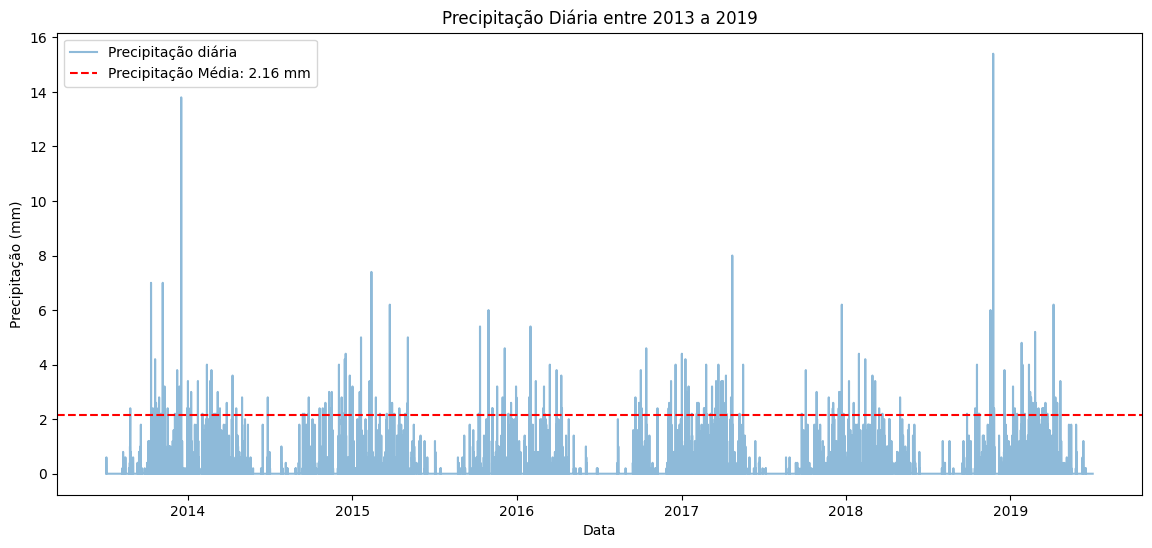

In [12]:


# Gráfico 1: Precipitação ao longo do tempo
plt.figure(figsize=(14, 6))
plt.plot(dados['Data'], dados['Precipitation (mm)'], label='Precipitação diária', alpha=0.5)

 # Adicionar a linha de precipitação média com valor na legenda
plt.axhline(y=precipitacao_media, color='red', linestyle='--', label=f'Precipitação Média: {precipitacao_media:.2f} mm')

plt.title('Precipitação Diária entre 2013 a 2019')
plt.xlabel('Data')
plt.ylabel('Precipitação (mm)')
plt.legend()

plt.show()



In [13]:
dados

,Precipitation (mm),Solar (Wm-2),Wind Direction (°),Wind Speed (m/s),Gust Speed (m/s),Temperature (°C),RH (%),Dew Point (°C),Data,Mês,Ano
Datetime,,,,,,,,,,,
2013-07-04 12:30:00,0.0,3.0,47.7,2.27,5.29,NaN,NaN,NaN,2013-07-04 12:30:00,7,2013
2013-07-04 13:00:00,0.0,3.0,59.0,1.26,4.03,NaN,NaN,NaN,2013-07-04 13:00:00,7,2013
2013-07-04 13:30:00,0.0,3.0,212.0,1.76,5.79,NaN,NaN,NaN,2013-07-04 13:30:00,7,2013
2013-07-04 14:00:00,0.0,3.0,216.2,2.77,5.79,NaN,NaN,NaN,2013-07-04 14:00:00,7,2013
2013-07-04 14:30:00,0.0,3.0,162.9,0.50,3.02,NaN,NaN,NaN,2013-07-04 14:30:00,7,2013
...,...,...,...,...,...,...,...,...,...,...,...
2019-07-02 10:30:00,0.0,NaN,NaN,2.52,5.79,NaN,NaN,NaN,2019-07-02 10:30:00,7,2019
2019-07-02 11:00:00,0.0,NaN,NaN,3.02,6.80,NaN,NaN,NaN,2019-07-02 11:00:00,7,2019
2019-07-02 11:30:00,0.0,NaN,NaN,2.77,5.54,NaN,NaN,NaN,2019-07-02 11:30:00,7,2019


/tmp/ipykernel_15779/993361682.py:17: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_date_range = pd.date_range(start=start_date, end=end_date, freq='30T')
/tmp/ipykernel_15779/993361682.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  soma_mensal = dados_filtrados['Precipitation (mm)'].resample('M').sum()
/tmp/ipykernel_15779/993361682.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_15779/993361682.py:56: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


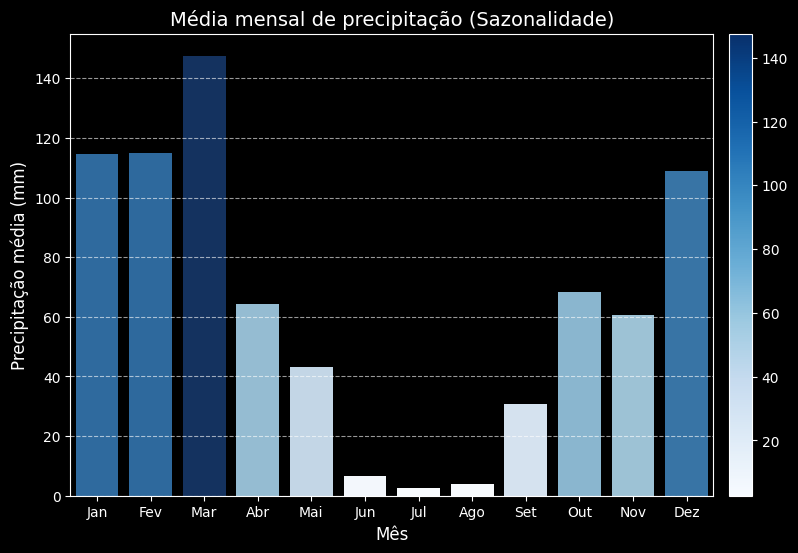

In [3]:

# Carregar os dados
f = "../../Weather Station Data/CasaDeAgua_CDAWX_4July13_1July19.csv"
dados = pd.read_csv(f, encoding="latin1")

# Converter a coluna de data para o formato datetime
dados['Datetime'] = pd.to_datetime(dados['Datetime'], format='%m/%d/%Y %H:%M')

# Determinar os anos mínimo e máximo do conjunto de dados
min_year = dados['Datetime'].dt.year.min()
max_year = dados['Datetime'].dt.year.max()

# Definir o intervalo de datas abrangendo anos completos
start_date = f"{int(min_year)}/01/01 00:00"
end_date = f"{int(max_year)}/12/31 23:59"

# Criar um intervalo completo com frequência de 30 minutos
full_date_range = pd.date_range(start=start_date, end=end_date, freq='30T')

# Reindexar o DataFrame para o intervalo completo de datas e horários
dados.set_index('Datetime', inplace=True)
dados_full = dados.reindex(full_date_range)

# Renomear o índice para 'Datetime'
dados_full.index.name = 'Datetime'

# Adicionar uma coluna de ano para análise
dados_full['Ano'] = dados_full.index.year

# Calcular o percentual de valores ausentes por ano
percent_nan_por_ano = dados_full['Precipitation (mm)'].isna().groupby(dados_full['Ano']).mean() * 100

# Selecionar apenas os anos com menos de 10% de NaN
anos_validos = percent_nan_por_ano[percent_nan_por_ano < 10].index

# Filtrar o DataFrame para conter apenas os anos válidos
dados_filtrados = dados_full[dados_full['Ano'].isin(anos_validos)]

# Calcular a soma mensal da variável de precipitação
soma_mensal = dados_filtrados['Precipitation (mm)'].resample('M').sum()

# Criar um DataFrame com mês e soma mensal
df = pd.DataFrame({'Data': soma_mensal.index, 'soma': soma_mensal.values})
df['Mês'] = df['Data'].dt.month

# Calcular a média mensal
media_mensal = df.groupby('Mês')['soma'].mean()

# Criar uma escala de cores baseada nos valores de precipitação
norm = mcolors.Normalize(vmin=media_mensal.min(), vmax=media_mensal.max())
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)

plt.style.use('dark_background')

# Adicionar as cores ao gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x=media_mensal.index,
    y=media_mensal.values,
    palette=sns.color_palette('Blues', as_cmap=True)(norm(media_mensal.values))
)

# Configurações do gráfico
plt.title('Média mensal de precipitação (Sazonalidade)', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Precipitação média (mm)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Adicionar uma barra de cores
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical', pad=0.02)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
